# Support Vector Machine (SVM)

**SVM** is a **Supervised Machine Learning algorithm** that classifies cases by finding a hyperplane <br>

A **Support Vector Machine** is a **discriminative classifier** formally defined by a separating hyperplane

## 1. Theory

At first approximation, what SVMs do is to find a separating line (or Hyperplane) between data of two classes. <br>
SVM is an algorithm that takes the data as an input and outputs a line that separates those classes if possible.

![2classes.png](images/2classes.png)

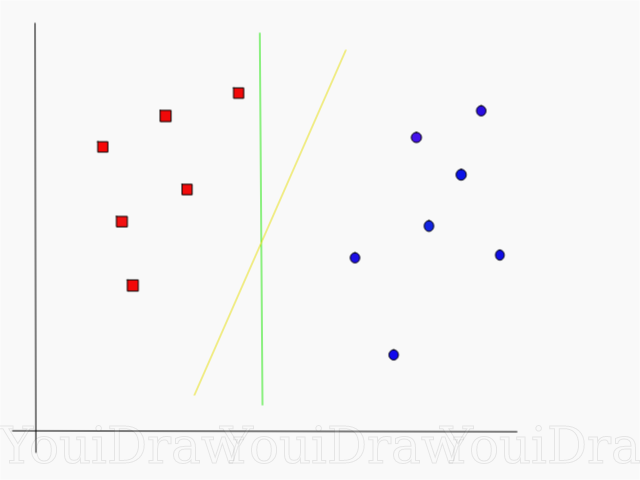

### 1.1 How to find the best fitting line using SVM

According to the SVM algorithm, we
- find the points closest to the line from both the classes. These points are called **Support Vectors**<br>
- compute the distance between the line and the support vectors. This distance is called the **Margin**<br>
- **maximize the margin**. The hyperplane for which the margin is maximum is the **Optimal Hyperplane**

![svm.png](images/svm.png)

Thus, SVM tries to make a Decision Boundary in such a way that the separation between the two classes (margin) is as wide as possible.

### 1.2 Dealing with non-linear Decision Boundary

Suppose our data is not linearly separable, it can not be separated into 2 classes using a straight line as shown below

![nonlineardata.png](images/nonlineardata.png)

This data can be converted to linearly separable data in higher dimension.

![nonlineardatainhigherdimenion.png](images/nonlineardatainhigherdimenion.png)

If we can find a mapping from the 2D space into the 3D space where our observations are linearly separable, we can
- Transform our data from 2D into 3D
- Find a linear decision boundary by fitting a linear classifier (a plane separating the data) in the 3D space
- Map the linear decision boundary back into 2D space. The result will be a non-linear decision boundary in 2D

So we’ve essentially found a non-linear decision boundary while only doing the work of finding a linear classifier.<br>
This requires us to visit higher dimensions (here, 3D plane). This is where Kernels kick in.<br><br>

A **Kernel** refers to a method that allows us to apply Linear classifiers to Non-linear problems by mapping non-linear data into higher-dimension space without the need to visit or understand higher-dimension plane. <br>
It is nothing but a mathematical function of lower-dimensin vectors that represents the dot product of these vectors when mapped to higher dimentions. <br>
To summarize, Kernel methods use Kernel functions to map data(vectors) into  higher dimensions.<br>

Some popular Kernels are 
- Linear Kernel (no-Kernel)
- Polynomial Kernel
- Sigmoid Kernel
- Radial Basis Kernel (RBF)
- Anova RBF Kernel

#### NOTE: Most Kernel methods can be directly used using popular libraries, such as scikit-learn

### 1.3 Hyperplane

A hyperplane in an n-dimensional Euclidean space is a flat n-1 dimensional subset of that space that divides the space into two disconnected parts.<br>
For instance, in the above 2-Dimensional space, the Hyperplane is a 3-Dimensional plane that divides the 2-D space into 2 disconnected parts.<br><br>

It is the Hyperplane that divides our data points i.e. classifies them. So, our **goal is to find the optimal and accurate Hyperplane in higher dimension and map it to lower (original dimension)**

### 1.4 Tuning Parameters

#### 1. C

The effect of C can be considered as reciprocal of regularization parameter, λ. 
A single outlier, can make the model choose the decision boundary with smaller margin if the value of C is large. A small value of C ensures that the outliers are overlooked and best approximation of large margin boundary is determined.

![parameterC.png](images/parameterC.png)

Since C = 1/λ, <br>
Large C: Low bias, High Variance<br>
Small C: High bias, Low Variance

#### 2. Gamma

Gamma is used when we use the Gaussian RBF kernel. When using linear or polynomial kernel, only setting the C hypermeter is required.<br>
$ Gaussian \quad RBF(Kernel) = e(\frac{- ||x-l||^2}{2\sigma^2}) $ <br>
where, $x$-> data points, $l$->landmarks, $\sigma$->Gamma

Gamma defines how far the influence of a single training example reaches. <br>
If it has a low value it means that every point has a far reach i.e. even the far away points get considerable weight and we get a more linear curve, and high value of gamma means that every point has close reach and the decision boundary is just going to be dependent upon the points that are very close to the line which effectively results in ignoring some of the points that are very far from the decision boundary thus giving a wiggly curve as seen above

#### 3. Landmarks 

Support Vector Machine tries to find different features (higher order, etc) from the dataset i.e. for $$ X = \begin{bmatrix} x1 & x2 & x1*x2 & x2^{3} & .. \end{bmatrix}$$ we find $$ F = \begin{bmatrix} f1 & f2 & f3 & f4 & .. \end{bmatrix}_{m*m}$$
to predict $ y = \theta^{T} F $ instead of $ y = \theta^{T} X $ <br>

To find better features $F$, SVM picks points in (lower dimesion) space called **landmarks** and use Kernel functions to find the optimal Hyperplane. Generally, landmarks are chosen at the point of the training examples, i.e. landmarks equal to the number of training examples are chosen, ending up in  $ l^{1} l^{2} l^{3} .. l^{m}$ for m training examples

## 1.5 Optimization Objective (Cost Function)

The Support Vector Machine objective can be seen as a modification to the cost of logistic regression. Consider the sigmoid function, given as,

$ h_\theta(x) = \frac{1}{1+e^{-z}}$ where z = $\theta^T x $

The Cost Function of **Logistic Regression model** is given by 
$$ J(\theta) = \frac{-1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) + \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

Each traininng instance contributes to the cost function the following term

$$ (-y \log\frac{1}{1+e^{-z}})  - ((1-y)\log(1 - \frac{1}{1+e^{-z}}))
$$
<br>

When $ y = 1 $, the contributed term is $ - \log(\frac{1}{1+e^{-z}})$, and when $ y = 0 $, the contributed term is $- log(1 - \frac{1}{1+e^{-z}})$,  which can be seen in the plots below.<br>
The cost function of SVM, denoted as *cost <sub>1</sub>(z)* and *cost <sub>0</sub>(z)* respectively are a modification and a close approximation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

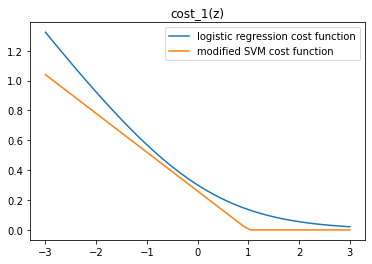

In [5]:
def svm_cost_1(x):
    return np.array([0 if _ >= 1 else -0.26*(_ - 1) for _ in x])

x = np.linspace(-3, 3)
plt.plot(x, -np.log10(1 / (1+np.exp(np.negative(x)))))
plt.plot(x, svm_cost_1(x))
plt.legend(['logistic regression cost function', 'modified SVM cost function'])
plt.title('cost_1(z)')
plt.show()

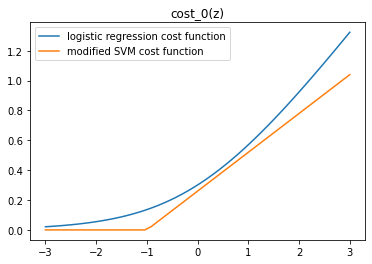

In [6]:
def svm_cost_0(x):
    return np.array([0 if _ <= -1 else 0.26*(_ + 1) for _ in x])

plt.plot(x, -np.log10(1-(1 / (1+np.exp(np.negative(x))))))
plt.plot(x, svm_cost_0(x))
plt.legend(['logistic regression cost function', 'modified SVM cost function'])
plt.title('cost_0(z)')
plt.show()

In order to come up with the cost function for the SVM, Cost Function of logistic Regression is modified by replacing the corresponding cost terms, which gives,
 
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} 
[y^{(i)} cost_1(z) + (1 - y^{(i)})cost_0(z)] + \frac{\lambda}{2m} \sum_{j=1}^{n}\theta_j^{2}$$

![cost.png](images/cost.png)

<br>

Following the conventions of SVM the following modifications are made to the cost in 
- removing $\frac{1}{m}$ does not affect the minimization logic at all as the minima of a function is not changed by the linear scaling
- change the form of parameterization from $ A + \lambda B$ to $ CA + B$ where it can be intuitively thought that $ C = \frac{1}{\lambda}$

After applying the above changes, our **Optimization Objective (Cost Function)** becomes

$$ J(\theta) = C \sum_{i=1}^{m} 
[y^{(i)} cost_1(\theta^{T}x^{i}) + (1 - y^{(i)})cost_0(\theta^{T}x^{i})] + \frac{1}{2} \sum_{j=1}^{n}\theta_j^{2}$$

<br>

The SVM Hypothesis predicts class labels

$$ h_\theta(x) = \begin{cases}
1, & if \quad  \theta^{T}x \geq 0 \\
0, & otherwise
\end{cases} $$

For **SVM training**, given training examples, $x$, features $f$ are computed, and $ y = 1 $ if $ \theta^{T}f \geq 0 $
<br>

So, the training objective (from Optimization objective) is modified as 

$$ min_\theta \quad C \sum_{i=1}^{m} 
[y^{(i)} cost_1(\theta^{T}f^{i}) + (1 - y^{(i)})cost_0(\theta^{T}f^{i})] + \frac{1}{2} \sum_{j=1}^{m}\theta_j^{2}$$


## 2. SVM implementation using scikit-learn

## 2.1 SVM for Regression

#### import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

####  import dataset

In [8]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)

In [9]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### perform Exploratory Data Analysis, Feature Engineering and other necessary operations to clean the data

In [11]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [12]:
df.dtypes
for x in df:
    if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
        print (df[x].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64


In [13]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())
X = df.drop('price',axis=1)
y = df['price']

#### split data into training and test set

In [21]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### perform necessary Feature Engineering

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)
X_test_std

array([[-0.06009623, -0.78752479, -0.73700487, -1.46467724, -1.25067019,
        -0.91706401, -1.40517397, -0.95916853, -1.0203247 , -0.44343127,
        -0.28884465, -0.86330974,  0.59637698,  2.00307062,  1.90588277,
        -1.46554666, -0.45374261,  0.45374261],
       [-1.70272655, -1.99286534,  0.46559401,  0.0196638 ,  0.2260397 ,
         0.30397643, -0.26901749, -0.48904409, -0.16729095,  0.19758908,
         2.23627826, -0.79012773, -1.25289282,  0.80415244,  0.44529971,
        -0.87396412,  2.20389266, -2.20389266],
       [-0.88141139,  0.08908652,  2.26188095,  1.77525498,  1.19353928,
         1.90396045,  1.5120859 ,  0.49821725,  1.36106119,  0.65164516,
         1.94265932, -0.25345965, -1.9720533 ,  0.05482858, -0.72316673,
        -0.31196071,  2.20389266, -2.20389266],
       [-0.88141139,  0.30823934,  0.1611386 ,  0.47928209,  0.2260397 ,
         0.38818611,  0.8840126 ,  1.17989769,  0.40139822, -0.01608437,
        -0.40629223,  1.13699856,  0.18542814, -1.144

#### train Support Vector Regression model

In [25]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear',C = 1000)

In [26]:
svr.fit(X_train_std,y_train)
y_test_pred = svr.predict(X_test_std)
y_train_pred = svr.predict(X_train_std)

In [27]:
y_test_pred

array([ 5305.86061521, 12114.59097698, 17671.93134975, 19364.03013048,
       18166.2200584 ,  8194.23144957, 14229.53994158,  5283.8724381 ,
       14328.02705201,  6374.62029218,  8839.35456637, 18500.46042267,
       10352.96966874,  9068.63832504, 12413.24809041, 17521.81134453,
        5872.64763231, 17739.58357284,  8029.7092699 ,  5681.25319283,
       10069.70659647,  9067.32298262, 28239.41068045,  5794.90238524,
       11297.49173925, 18449.43020919,  7978.48167967,  7613.61632934,
       13324.20956411, 28125.06416822, 26384.64022725, 12067.68134132,
        6792.1782905 , 17735.71911661,  7097.57891984, 10249.63443001,
       12163.59282125, 14756.68282295,  8387.79148655, 16739.56589111,
        5335.94946672])

#### evaluate model performance

In [31]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2 score :', r2_score(y_train,y_train_pred))
print('Mean Squared Error :', mean_squared_error(y_train,y_train_pred))


R2 score : 0.8510467833352213
Mean Squared Error : 8806043.280937098


#### plot performance of model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


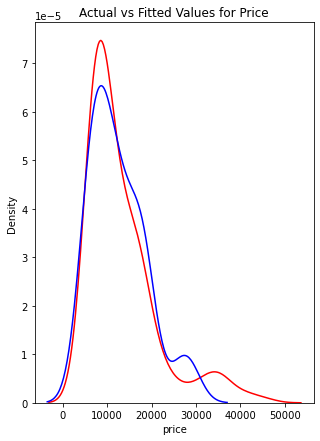

In [34]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.show()
plt.close()

#### NOTE: this may not be the best fitting model. Try different values for parameters 'kernel', 'C', 'gamma', 'degree', etc in SVR() method of sklearn.svm module

#### finally proceed by training the model with entire dataset

## 2.2 SVM for Classification

#### import libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### read data

In [47]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)
# Add a target column, and fill it with the target data
df['target'] = data.target
# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [49]:
# since this data is imported from sklearn, we know that it is clean and does not require any data cleaning

#### split training and testing data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### using StandardScaler()

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### build SVM Classification model

In [54]:
from sklearn import svm

svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_test,y_test)

y_train_pred = svm1.predict(X_train)
y_test_pred = svm1.predict(X_test)

y_test_pred

array([8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495.,
       8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495.,
       8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495.,
       8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495.,
       8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495., 8495.,
       8495., 8495., 8495., 8495., 8495., 8495.])

#### evaluate model performance

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy :', accuracy_score(y_test, y_test_pred))
print('Confusion Matrix :', confusion_matrix(y_test,y_test_pred))

Accuracy : 0.0392156862745098
Confusion Matrix : [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### NOTE: this may not be the best fitting model. Try different values for parameters 'kernel', 'C', 'gamma', 'degree', etc in SVC() method of sklearn.svm module

In [77]:
#### GridSearch

from sklearn.model_selection import GridSearchCV

param = {'C':(0,0.01,0.5,0.1,1,2,5,10,50,100,500,1000)}

svm1 = svm.SVC(kernel = 'rbf')
svm.grid = GridSearchCV(svm1, param, n_jobs=1, cv=2, verbose=1, scoring='accuracy')

In [78]:
svm.grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", 

GridSearchCV(cv=2, estimator=SVC(), n_jobs=1,
             param_grid={'C': (0, 0.01, 0.5, 0.1, 1, 2, 5, 10, 50, 100, 500,
                               1000)},
             scoring='accuracy', verbose=1)

In [79]:
linsvm_clf = svm.grid.best_estimator_
accuracy_score(y_test,linsvm_clf.predict(X_test))

0.0

#### similarly, use GridSearch to find the best fitting model by comparing performances of multiple models with different values for parameters (kernel, C, etc)

#### finally proceed by training the model with entire dataset

## References

- https://www.coursera.org/learn/machine-learning
- https://machinelearningmedium.com/2018/04/10/support-vector-machines/
- https://towardsdatascience.com/svm-support-vector-machine-for-classification-710a009f6873
- https://towardsdatascience.com/https-medium-com-pupalerushikesh-svm-f4b42800e989
- https://programmathically.com/what-is-a-kernel-in-machine-learning/